# One thing I do when a new attack is published is to see if the 'jpeg' defense works. That is, will the jpeg compressed version of the adversarial image be still classified as 'adversarial'.  
## There have been a couple of studies of the effect of JPG compression on adversarial images. See:

- https://arxiv.org/pdf/1705.02900.pdf
- https://arxiv.org/pdf/1608.00853.pdf

# Now, let us begin with the robust adversarial image of the tabby that was generated by the author of this notebook here: http://www.anishathalye.com/2017/07/25/synthesizing-adversarial-examples/

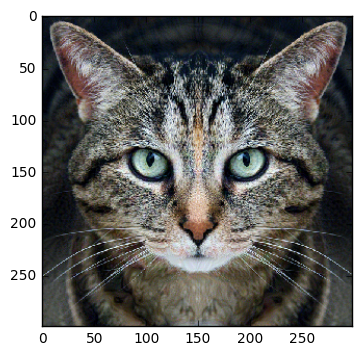

In [35]:
plt.imshow(adv_robust)

# Quick check to see if this adversarially perturbed image is misclassified as class-924 [Guacamole]

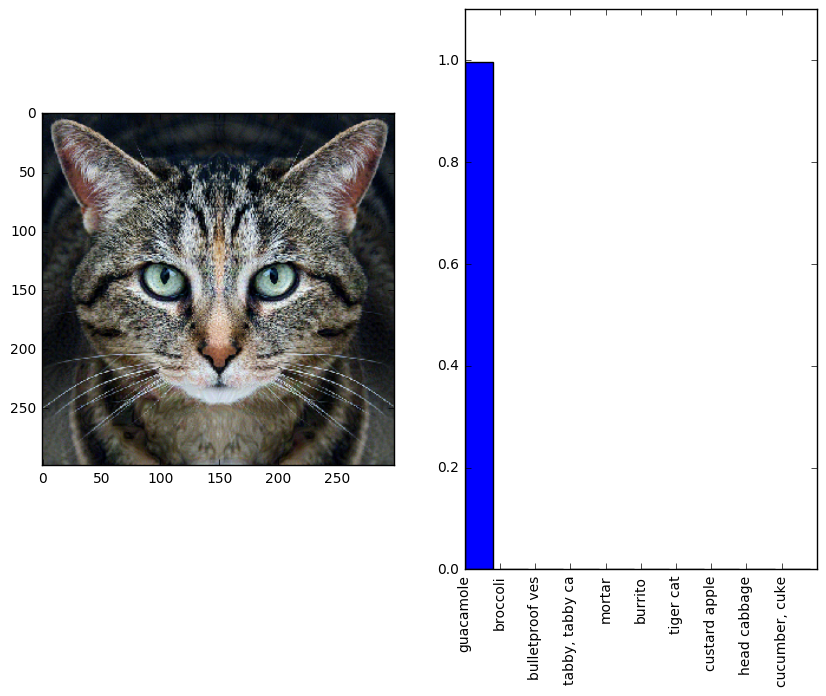

In [36]:
classify(adv_robust)

# Neat. Now, does it pass the jpeg test?

In [1]:
def img_ingest(img_path):
    img = PIL.Image.open(img_path)
    big_dim = max(img.width, img.height)
    wide = img.width > img.height
    new_w = 299 if not wide else int(img.width * 299 / img.height)
    new_h = 299 if wide else int(img.height * 299 / img.width)
    img = img.resize((new_w, new_h)).crop((0, 0, 299, 299))
    img = (np.asarray(img) / 255.0).astype(np.float32)
    return img

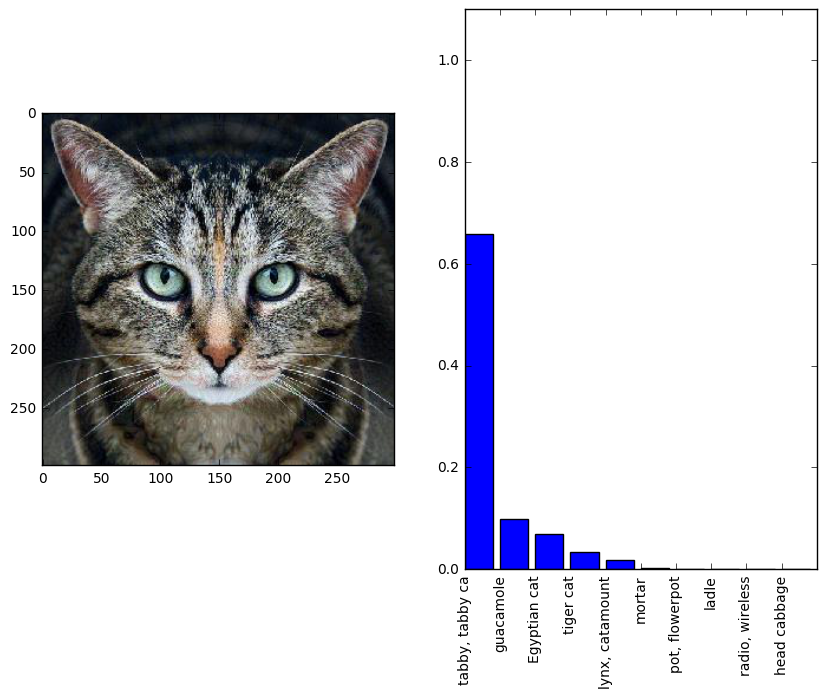

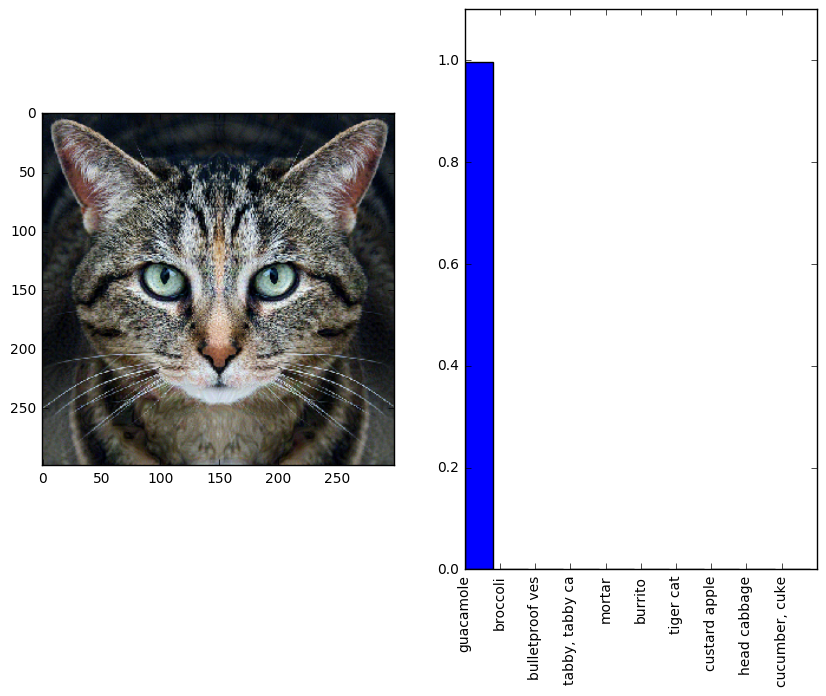

In [53]:
import scipy.misc
scipy.misc.imsave('guac_kitty.jpg', adv_robust)
guac_img=img_ingest('guac_kitty.jpg')
classify(guac_img)
classify(adv_robust)

# Nope!

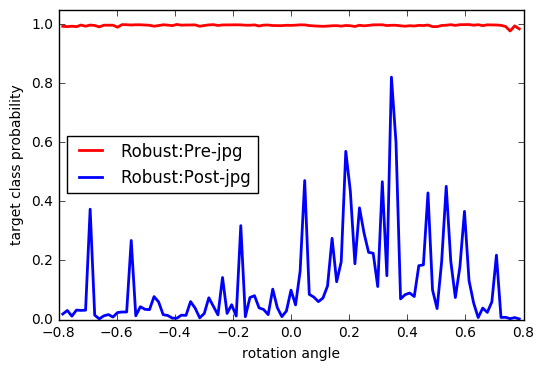

In [59]:
thetas = np.linspace(-np.pi/4, np.pi/4, 101)

p_naive = []
p_robust = []
for theta in thetas:
    rotated = rotated_image.eval(feed_dict={image: adv_robust, angle: theta})
    p_robust.append(probs.eval(feed_dict={image: rotated})[0][demo_target])
    
    rotated = rotated_image.eval(feed_dict={image:guac_img, angle: theta})
    p_naive.append(probs.eval(feed_dict={image: rotated})[0][demo_target])

robust_line, = plt.plot(thetas, p_robust, color='r', linewidth=2, label='Robust:Pre-jpg')
naive_line, = plt.plot(thetas, p_naive, color='b', linewidth=2, label='Robust:Post-jpg')
plt.ylim([0, 1.05])
plt.xlabel('rotation angle')
plt.ylabel('target class probability')
plt.legend(handles=[robust_line, naive_line], loc='center left')
plt.show()